<a href="https://colab.research.google.com/github/dtothej247/stockoptimizer/blob/main/Stock_Portfolio_Optimizer_Using_Pythog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier

In [ ]:
#Get stock tickers in the portfolio
assets = ['AAPL','AGNC','CSWC','GNOG','IRM','MAIN','NIO','PSEC','SBE','SDIV','SPHD','TSLA','APXT','IDEX','ZOM','CRIS','FCEL','PLTR']

In [ ]:
# Assign weights to tickers
weights = np.array([0.1085,0.0763,0.0856,0.0876,0.0874,0.0602,0.0426,0.0524,0.0248,0.0549,0.0650,0.0236,0.0902,0.0302,0.0292,0.0289,0.092,0.0192])

In [ ]:
#Get stock starting date
stockStartDate = '2013-01-01'

In [ ]:
# End date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-28'

In [ ]:
#Create Data Frame to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [ ]:
# Show data frame (df)
df

,AAPL,AGNC,CSWC,GNOG,IRM,MAIN,NIO,PSEC,SBE,SDIV,SPHD,TSLA,APXT,IDEX,ZOM,CRIS,FCEL,PLTR
Date,,,,,,,,,,,,,,,,,,
2013-01-02,17.039789,11.042173,15.739470,NaN,17.624949,16.352285,NaN,4.068592,NaN,12.378457,18.152298,7.072000,NaN,1.51,NaN,18.299999,135.360001,NaN
2013-01-03,16.824715,11.148136,15.754456,NaN,17.949093,16.341682,NaN,4.079679,NaN,12.306873,18.174166,6.954000,NaN,1.44,NaN,17.950001,146.880005,NaN
2013-01-04,16.356062,11.345448,15.890882,NaN,18.240284,16.394674,NaN,4.146193,NaN,12.378457,18.305397,6.880000,NaN,1.44,NaN,17.549999,149.759995,NaN
2013-01-07,16.259851,11.224868,15.441142,NaN,18.130402,16.294003,NaN,4.146193,NaN,12.405989,18.268944,6.868000,NaN,1.44,NaN,17.100000,152.639999,NaN
2013-01-08,16.303608,11.239484,15.688498,NaN,17.910639,16.352285,NaN,4.124023,NaN,12.383957,18.182196,6.736000,NaN,1.44,NaN,17.250000,159.839996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,126.000000,16.390507,22.070000,15.54,31.809999,35.432163,50.680000,7.917165,36.290001,13.580000,39.939999,714.500000,13.84,3.53,2.10,10.080000,17.870001,28.000000
2021-02-23,125.860001,16.211809,21.969999,15.04,32.099998,35.432163,49.110001,7.381417,33.180000,13.690000,40.070000,698.840027,12.60,3.23,1.89,9.690000,17.170000,26.750000
2021-02-24,125.349998,16.460001,22.360001,15.28,34.650002,36.715000,51.860001,7.560000,34.490002,13.810000,40.599998,742.020020,13.72,3.45,2.05,9.930000,18.350000,26.389999


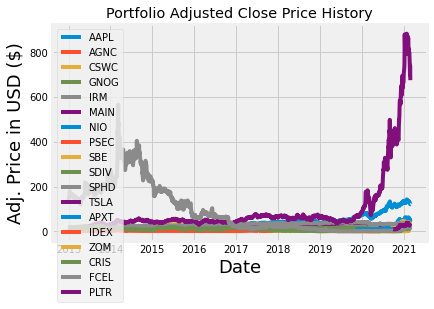

In [ ]:
#Visually show the stock / protfolio
title = 'Portfolio Adjusted Close Price History'

#Get stocks
my_stocks = df

#Create and plot graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price in USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
# Show daily simple returns
returns = df.pct_change()
returns

,AAPL,AGNC,CSWC,GNOG,IRM,MAIN,NIO,PSEC,SBE,SDIV,SPHD,TSLA,APXT,IDEX,ZOM,CRIS,FCEL,PLTR
Date,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.009596,0.000952,NaN,0.018391,-0.000648,NaN,0.002725,NaN,-0.005783,0.001205,-0.016686,NaN,-0.046358,NaN,-0.019126,0.085106,NaN
2013-01-04,-0.027855,0.017699,0.008660,NaN,0.016223,0.003243,NaN,0.016304,NaN,0.005817,0.007221,-0.010641,NaN,0.000000,NaN,-0.022284,0.019608,NaN
2013-01-07,-0.005882,-0.010628,-0.028302,NaN,-0.006024,-0.006141,NaN,0.000000,NaN,0.002224,-0.001991,-0.001744,NaN,0.000000,NaN,-0.025641,0.019231,NaN
2013-01-08,0.002691,0.001302,0.016019,NaN,-0.012121,0.003577,NaN,-0.005347,NaN,-0.001776,-0.004748,-0.019220,NaN,0.000000,NaN,0.008772,0.047170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,-0.029799,0.003038,0.023655,-0.082645,-0.011191,0.017709,-0.079215,0.051383,-0.001376,0.001475,0.009223,-0.085499,-0.027407,-0.085492,-0.078947,-0.018501,-0.116221,-0.034483
2021-02-23,-0.001111,-0.010903,-0.004531,-0.032175,0.009117,0.000000,-0.030979,-0.067669,-0.085699,0.008100,0.003255,-0.021917,-0.089595,-0.084986,-0.100000,-0.038691,-0.039172,-0.044643
2021-02-24,-0.004052,0.015309,0.017752,0.015957,0.079439,0.036205,0.055997,0.024194,0.039482,0.008766,0.013227,0.061788,0.088889,0.068111,0.084656,0.024768,0.068725,-0.013458


In [ ]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252 # shows how two random variables vary or move together
cov_matrix_annual

,AAPL,AGNC,CSWC,GNOG,IRM,MAIN,NIO,PSEC,SBE,SDIV,SPHD,TSLA,APXT,IDEX,ZOM,CRIS,FCEL,PLTR
AAPL,0.082039,0.016113,0.019042,0.022899,0.024431,0.027817,0.095756,0.018614,0.005460,0.024504,0.023099,0.050729,0.008047,0.044629,0.039452,0.037313,0.045829,0.066068
AGNC,0.016113,0.055360,0.024507,0.020289,0.022986,0.029186,0.057158,0.019289,0.013975,0.025570,0.021655,0.021429,0.012295,0.026194,0.034544,0.012745,0.040511,0.011017
CSWC,0.019042,0.024507,0.134203,0.007002,0.021106,0.043451,0.057885,0.023569,0.013185,0.025645,0.022048,0.039181,0.008952,0.033793,0.031311,0.030691,0.042568,-0.014783
GNOG,0.022899,0.020289,0.007002,0.357774,0.018631,0.011003,0.032347,0.004395,0.074054,0.015058,0.015686,0.058841,0.087487,0.156710,0.010597,-0.010777,0.124966,0.212319
IRM,0.024431,0.022986,0.021106,0.018631,0.081826,0.030079,0.043622,0.019846,0.028354,0.026583,0.030001,0.028915,0.004298,0.020906,0.035322,0.022770,0.050824,0.073828
MAIN,0.027817,0.029186,0.043451,0.011003,0.030079,0.079093,0.076362,0.037620,0.022769,0.035169,0.030967,0.045717,0.011864,0.050516,0.028724,0.029701,0.053824,0.020024
NIO,0.095756,0.057158,0.057885,0.032347,0.043622,0.076362,1.244991,0.039122,0.092191,0.074671,0.053405,0.197160,0.038404,0.223866,0.137970,0.131964,0.380021,0.214355
PSEC,0.018614,0.019289,0.023569,0.004395,0.019846,0.037620,0.039122,0.061204,0.017193,0.023689,0.020843,0.025487,0.006671,0.038439,0.025155,0.020355,0.040573,0.031286
SBE,0.005460,0.013975,0.013185,0.074054,0.028354,0.022769,0.092191,0.017193,0.375090,0.020029,0.029816,0.055609,0.060775,0.263474,-0.011386,0.141657,0.261592,0.319686
SDIV,0.024504,0.025570,0.025645,0.015058,0.026583,0.035169,0.074671,0.023689,0.020029,0.034024,0.027177,0.035512,0.011544,0.033740,0.043438,0.028130,0.048150,0.009000


In [ ]:
#Calculate portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.07578776942024526

In [ ]:
# Calculate portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.27529578532960736

In [ ]:
# Calculate annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3933266471162004

In [ ]:
# Show expected annual return, volatility, and variance

percent_var = str( round(port_variance,4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,4) * 100) + '%'

print('Expected Annual Return: ' + percent_ret)
print('Annual Volatility: ' + percent_vols)
print('Annual Variance: ' + percent_var)

Expected Annual Return: 39.33%
Annual Volatility: 27.529999999999998%
Annual Variance: 7.580000000000001%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 1.0MB 11.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.10-cp37-cp37m-linux_x86_64.whl size=2684353 sha256=651cedae6ddd131c0d39a2600d05c1cb9652d9290ff4095894dca00b79745fe6
  Stored in directory: /root/.cache/pip/wheels/64/d6/c9/9295499aefa5af80018eaabffd09216170a1349b45551fb8d5
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
# Portfolio Optimization

#Calculate expected returns and the annualized sample covariance of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio - measures performance of an investment ?
ef = EfficientFrontier(mu, S)
hi = ef.efficient_return(2.0)
print(hi)
ef.portfolio_performance(verbose = True)


OrderedDict([('AAPL', 0.0), ('AGNC', 0.091764173427801), ('CSWC', 0.0674085205736122), ('GNOG', 0.0), ('IRM', 0.0), ('MAIN', 0.0), ('NIO', 0.0), ('PSEC', 0.0), ('SBE', 0.0), ('SDIV', 0.0), ('SPHD', 0.5360896988715812), ('TSLA', 0.0), ('APXT', 0.0349672435901987), ('IDEX', 0.0), ('ZOM', 0.0), ('CRIS', 0.0491305974683964), ('FCEL', 0.0), ('PLTR', 0.2206397660684104)])
Expected annual return: 200.0%
Annual volatility: 27.7%
Sharpe Ratio: 7.14


(1.9999999999999996, 0.2774294488540338, 7.136949621529735)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = ef.efficient_return(1.0)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1019.98)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds remaining: ${:0.2f}'.format(leftover))

Discrete Allocation: {'AGNC': 6, 'CSWC': 3, 'SPHD': 14, 'APXT': 3, 'CRIS': 5, 'PLTR': 9}
Funds remaining: $5.41
